# Stable matching problem

In [117]:
from random import shuffle
from random import randint
from copy import deepcopy
import matplotlib.pyplot as plt
import time

In [118]:
def randomPrefrencesListBuilder(elementNum):
    pList = list(range(elementNum))
    for i in range(elementNum):
        pList[i] = list(range(elementNum))
        shuffle(pList[i])
    return pList

In [119]:
def validateSM(menPrefrences,womenPrefrences,men,women) :
    reversedWomenPrefrencesList = getReversedList(womenPrefrences,women)
    reversedMenPrefrencesList = getReversedList(menPrefrences,men)
    for i in range(len(women)) :
        for j in range(i,len(women)) :
            if(reversedWomenPrefrencesList[women[i]][men[i]] > reversedWomenPrefrencesList[women[i]][men[j]]
                and reversedMenPrefrencesList[men[j]][women[i]] < reversedMenPrefrencesList[men[j]][women[j]]) :
                return False
            elif (reversedWomenPrefrencesList[men[i]][women[i]] > reversedWomenPrefrencesList[men[i]][women[j]]
                and reversedMenPrefrencesList[women[j]][men[i]] < reversedMenPrefrencesList[women[j]][men[j]]) :
                return False
    return True

In [120]:
def getReversedList(womenPrefrences,women) :
    reversedList = list(range(len(women)))
    for i in range(len(womenPrefrences)) :
        reversedList[women[i]] = list(range(len(women)))
        k = 0
        for j in womenPrefrences[women[i]] :
            reversedList[women[i]][j] = k
            k += 1
    return reversedList

In [121]:
def bruteForceAlgorithm(menPrefrences,womenPrefrences,men,women,counter = 0):
    startTime = time.time()
    list = []
    if counter == len(women) - 1 :
        if(validateSM(menPrefrences,womenPrefrences,men,women)) :
            return time.time() - startTime
        else :
            return None

    while(len(list) != len(women) - counter) :
        man = randint(counter, len(men) - 1)
        while(man in list) :
            man = randint(counter, len(men) - 1)
        list.append(man)
        women[counter], women[man] = women[man], women[counter]
        if bruteForceAlgorithm(menPrefrences, womenPrefrences, men, women, counter + 1) == None:
            women[counter], women[man] = women[man], women[counter]
        else:
            return time.time() - startTime
        
    if counter == 0 :
        return time.time() - startTime
    
    return None

In [122]:
def galeShapleyAlgorithm(menPrefrences,womenPrefrences,men,women):
    startTime = time.time()
    if(len(men) != 0) :
        stableList = {}
        reversedWomenPrefrencesList = getReversedList(womenPrefrences,women)
        while(len(men) != 0) :
            man = men.pop()
            woman = menPrefrences[man].pop(0)
            if woman not in stableList :
                stableList[woman] = man
            elif reversedWomenPrefrencesList[woman][man] < reversedWomenPrefrencesList[woman][stableList[woman]] :
                men.append(stableList[woman])
                stableList[woman] = man
            else :
                men.append(man)
    return time.time() - startTime

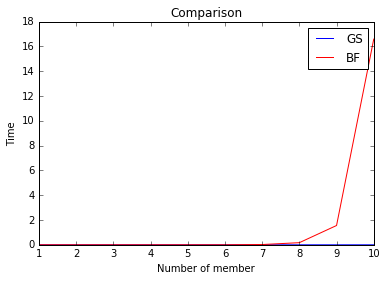

In [79]:
gSSpeed = []
bFSpeed = []

for counter in range(0,10) :
    tmp = []
    menPrefrences = randomPrefrencesListBuilder(counter)
    womenPrefrences = randomPrefrencesListBuilder(counter)
    gSSpeed.append(galeShapleyAlgorithm(deepcopy(menPrefrences),deepcopy(womenPrefrences),list(range(counter)),list(range(counter))))
    for i in range(0,10) :
        tmp.append(bruteForceAlgorithm(deepcopy(menPrefrences),deepcopy(womenPrefrences),list(range(counter)),list(range(counter))))
    bFSpeed.append(sum(tmp)/10)
    
plt.plot(list(range(1,11)),gSSpeed,label="GS")
plt.plot(list(range(1,11)),bFSpeed,color = "r",label="BF")
plt.xlabel('Number of member')
plt.ylabel('Time')
plt.title('Comparison')
plt.legend()
plt.show()

# Subsets of size k from given array

In [123]:
def getKSubsets(set,k=0,counter=0,binary=[],list = []) :
    if len(binary) == 0:
        binary = [False for i in range(len(set))]
    print("here")
    if (k == 0):
        list.append([set[j] for j in range(len(binary)) if binary[j]])
        return list
    for i in range(counter,len(set)-k + 1) :
        binary[i] = True
        getKSubsets(set,k-1,i + 1,binary,list)
        binary[i] = False
    return list

# Multiple answer for stable matching problem

With Gale–Shapley algorithm We can have 2 diffrent stable matching :
1. If we choose men matching for while condition
2. If we choose women matching for while condition


In [128]:
def galeShapleyAlgorithmI(menPrefrences,womenPrefrences,men,women):
    stableList = {}
    reversedWomenPrefrencesList = getReversedList(womenPrefrences,women)
    while(len(men) != 0) :
        man = men.pop()
        # print(menPrefrences[man])
        woman = menPrefrences[man].pop(0)
        if woman not in stableList :
            stableList[woman] = man
        elif reversedWomenPrefrencesList[woman][man] < reversedWomenPrefrencesList[woman][stableList[woman]] :
            men.append(stableList[woman])
            stableList[woman] = man
        else :
            men.append(man)
    return stableList

menPrefrences = randomPrefrencesListBuilder(5)
womenPrefrences = randomPrefrencesListBuilder(5)
women = list(range(5))
men = list(range(5))
print(galeShapleyAlgorithmI(deepcopy(menPrefrences),deepcopy(womenPrefrences),deepcopy(men),deepcopy(women)))
print(galeShapleyAlgorithmI(deepcopy(womenPrefrences),deepcopy(menPrefrences),deepcopy(women),deepcopy(men)))

{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}


And if we shuffle list of men and women , the answer will not change.

In [129]:
shuffle(men)
shuffle(women)
print(galeShapleyAlgorithmI(deepcopy(menPrefrences),deepcopy(womenPrefrences),deepcopy(men),deepcopy(women)))
print(galeShapleyAlgorithmI(deepcopy(womenPrefrences),deepcopy(menPrefrences),deepcopy(women),deepcopy(men)))

{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}


So i decided to use the BruteForce Algorithm for producing diffrent answers.

In [134]:
def multiStableMatching(menPrefrences, womenPrefrences, men, women, counter=0):
    list = []
    if counter == len(women) - 1:
        if (validateSM(menPrefrences, womenPrefrences, men, women)):
            relation = {}
            for i in range(len(men)) :
                relation[women[i]] = men[i]
            return relation
        else:
            return None

    while (len(list) != len(women) - counter):
        man = randint(counter, len(men) - 1)
        while (man in list):
            man = randint(counter, len(men) - 1)
        list.append(man)
        women[counter], women[man] = women[man], women[counter]
        relation = multiStableMatching(menPrefrences, womenPrefrences, men, women, counter + 1)
        if relation == None:
            women[counter], women[man] = women[man], women[counter]
        else:
            return relation

    return None

In [135]:
for i in range(10):
    print(multiStableMatching(deepcopy(menPrefrences),deepcopy(womenPrefrences),deepcopy(men),deepcopy(women)))

{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 4, 2: 2, 3: 3, 4: 1}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


# All Stable Matching

In [153]:
def allStableMatching(menPrefrences, womenPrefrences, men, women, counter=0,sMatching = []):
    list = []
    if counter == len(women) - 1:
        if (validateSM(menPrefrences, womenPrefrences, men, women)):
            relation = {}
            for i in range(len(men)) :
                relation[women[i]] = men[i]
            sMatching.append(relation)
            return

    while (len(list) != len(women) - counter):
        man = randint(counter, len(men) - 1)
        while (man in list):
            man = randint(counter, len(men) - 1)
        list.append(man)
        women[counter], women[man] = women[man], women[counter]
        allStableMatching(menPrefrences, womenPrefrences, men, women, counter + 1,sMatching)
        women[counter], women[man] = women[man], women[counter]

    return sMatching

In [154]:
print(allStableMatching(deepcopy(menPrefrences),deepcopy(womenPrefrences),deepcopy(men),deepcopy(women)))

[{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, {0: 0, 1: 4, 2: 2, 3: 3, 4: 1}]
